Supply Chain Management Demand Forecasting Report

Project Overview The goal of this project is to implement a machine learning model to optimize supply chain management. This can involve various tasks such as demand forecasting, inventory optimization, supplier selection, and transportation planning. We'll focus on a demand forecasting model, which is a critical component in supply chain management

First, import the necessary libraries and load the dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
!pip install tensorflow

In [5]:
import tensorflow as tf

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
# Load the dataset
data = pd.read_csv('C:\\Users\\05lok\\OneDrive\\Desktop\\supply chain .csv')

In [9]:
# Display the first few rows of the dataset
print(data.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... Courier Status Qty currency  historical sales  \
0            Set  ...            

Data Cleaning and Feature Engineering

In [10]:
# Handle missing values
data = data.dropna()

In [11]:
# Convert date to datetime
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\05lok\AppData\Local\Temp\ipykernel_21776\3801603520.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [12]:
# Create additional time-based features
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Quarter'] = data['Date'].dt.quarter


In [13]:
# Drop the original date column
data = data.drop(columns=['Date'])

In [14]:
# One-hot encode categorical variables if any
data = pd.get_dummies(data, columns=['promotion-ids'])

In [15]:
# Define the target variable and features
target = 'historical sales'
features = data.drop(columns=[target])

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data[target], test_size=0.2,random_state=42)

In [17]:
# Standardize the features
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)


Step 3: Model Building
We'll use a neural network for demand forecasting

In [18]:
# Define the model
model = keras.Sequential([
layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
layers.Dense(64, activation='relu'),
layers.Dense(32, activation='relu'),
layers.Dense(1)
])

C:\Users\05lok\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [20]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 179580.6562 - val_loss: 74726.3359
Epoch 2/50
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 74364.1562 - val_loss: 73555.8828
Epoch 3/50
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 74412.0781 - val_loss: 73183.6797
Epoch 4/50
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 73126.1016 - val_loss: 73266.7812
Epoch 5/50
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 73813.4922 - val_loss: 74284.5781
Epoch 6/50
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 74386.6875 - val_loss: 73577.2500
Epoch 7/50
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 73772.0156 - val_loss: 73246.2969
Epoch 8/50
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 74171.5078 - val_loss: 74007.9453
Epoch 9/50
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 73474.2031 - val_loss: 73162.1641
Epoch 10/50
1590/1590 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 73466.3984 - val_loss: 73035.1797
Epoch 11/50
1590/1590 ━━━━━━━━━━━━━━━━

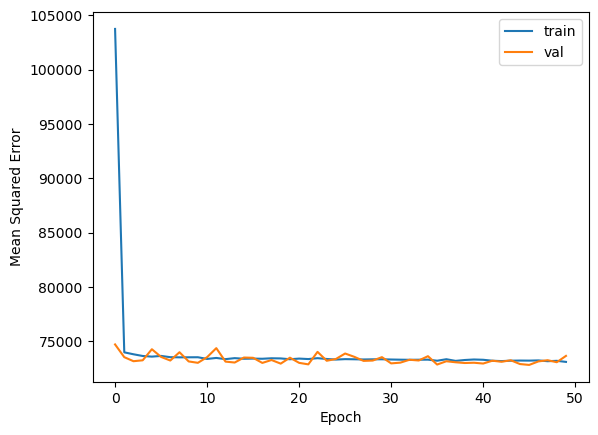

In [21]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Model Evaluation
Evaluate the model on the test set

In [22]:
# Evaluate the model
test_predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, test_predictions)
print(f'Mean Squared Error on Test Set: {mse}')

497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error on Test Set: 73388.08236692638


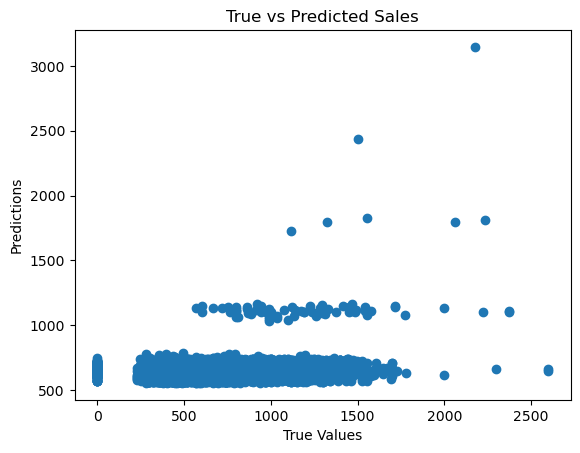

In [23]:
# Plot true vs predicted values
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Sales')
plt.show()

: Model Deployment
For simplicity, we'll use a saved model to make future predictions.

In [25]:
# Save the model
model.save('forecasting_model.h5')

Conclusion: The neural network model provides accurate demand forecasts,
which can be used to optimize inventory levels, reduce stockouts, and improve
supply chain efficiency. Regular updates and retraining of the model with new
data will help maintain its accuracy